# Decision Trees

### The following few portions will be referencing resources mainly from Kilian Weinberger's materials from CS4780 [1]
### Some of the following code were taken and adapted from ML-From-Scratch repo by Erik Linder-Norén [2]

Decision Trees is a supervised learning method that creates a model that is able to predict labels by learning decision rules from the training features. 

Like the k-nearest neighbor classifier, it assumes that similar data points will share similar labels. However, unlike k-nn, it does not need to store training data. Training data is used to build a tree structure that recursively divides the space into regions with the aim of keeping each node in the tree as 'pure' as possible. The purity of the node is determined by the similarly of the labels of data points belonging to that node. Additionally, decision trees test time is more efficient than k-nn because they do not scale linearly with more training data; testing requires traversal of the tree which is O(logn) at worst.



A good decision tree:
1. Is maximally compact
    - The shallower the better
    
    
2. Only has pure leaves
    - Reduced uncertainty when classifying test data at leaves

Initially, the tree only contains the root node that represents the entire training data set. This set is then split roughly in half along a feature dimension by a threshold $t$. All points that have that feature value $\geq t$ will fall into the right child node, and the others in the right child node. The threshold $t$ and the dimension are chosen so that the resulting child nodes are purer in terms of class membership. Ideally all positive points fall into one child node and all negative points in the other. If this is the case, the tree is done. If not, the leaf nodes are again split until eventually all leaves are pure (i.e. all its data points contain the same label) or cannot be split any further (in the rare case with two identical points of different labels).

### ID-3 Algorithm

The ID-3 algorithm is used when splitting data at each decision node. At each decision node, the algorithm makes a decision based on minimising an **impurity function**. Because the goal is to keep each leaf as pure as possible, the algorithm can be also be viewed as trying to maximise the **information gain** at each node, or minimising the **variance** or **entropy** at each node. 

At the beginning of each iteration, it iterates through each feature of the remaining data set and calculates the information gain of splitting data using that feature. The feature that gives the largest information gain, or reduces entropy the most will be chosen. Data is split accordingly and the algorithm repeats. Note that a feature will not be reused in subsequent deeper nodes as it will not make a difference information gain.

At base case:
<br>

$$
\textrm{ID3}(S):\left\{ \begin{array}{ll}
\textrm{if } \exists \bar{y}\textrm{ s.t. }\forall(x,y)\in S, y=\bar{y}\Rightarrow \textrm{return leaf } \textrm{ with label } \bar{ y}\\
\textrm{if } \exists\bar{x}\textrm{ s.t. }\forall(x,y)\in S, x=\bar{x}\Rightarrow \textrm{return leaf } \textrm{ with mode}(y:(x,y)\in S)\textrm{ or mean (regression)}\end{array} \right.
$$
<br>

The first case means that all the data in that leaf have the same label. The second case occurs when the leaf have data of different labels, but there are no more features/attributes left to split the data. In that case, pick the most common label for classification, or take the mean of the labels for regression.

## Impurity Functions

### Gini Impurity (Categorical)

For a given dataset $S$ with $c$ number of classes, the Gini impurity of a **leaf** is given as:

$$
G(S)=\sum_{k=1}^{c}p_k(1-p_k)
$$

where

$$
p_k=\frac{\left | S_k \right |}{\left | S \right |}\leftarrow \textrm{fraction of inputs in } S \textrm{ with label } k
$$


The Gini impurity of a **tree**:

$$
G^T(S)=\frac{\left | S_L \right |}{\left | S \right |}G^T(S_L)+\frac{\left | S_R \right |}{\left | S \right |}G^T(S_R)
$$

where:
- $\left ( S=S_L\cup S_R \right )$
- $S_L\cap S_R=\varnothing$
- $\frac{\left | S_L \right |}{\left | S \right |}\leftarrow \textrm{fraction of inputs in left substree}$
- $\frac{\left | S_R \right |}{\left | S \right |}\leftarrow \textrm{fraction of inputs in right substree}$


### Entropy (Categorical)

As mentioned earlier, the entropy of a leaf/tree can be viewed as the measure of disorder of labels, or how different are data points.

For a leaf:

$$
H(S) = -\sum_{k}p_klog(p_k)
$$

For a tree:

$$
H^T(S)=p^LH(S^L)+p^RH(S^R) \\
\small{where: }\small{p^L=\frac{|S^L|}{|S|}, p^R=\frac{|S^R|}{|S|}}
$$

### Variance (Regression)

Variance, like entropy, measures how different labels are when they are continuous. The goal is to reduce the variation of continuous labels.

For a leaf:

$$
Var(S) = \frac{1}{N}\sum_{N}({X-\mu})^2
$$

where $N$ is the number of data points in that leaf, $X$ is the value of the dependent label, and $\mu$ is the mean of all the $X$s.

Like the Gini coefficient, the variance is weighted in proportion to the number of data points in each subtree. 

For a tree:

<br>

$$
Var^T(S)=\frac{\left | S_L \right |}{\left | S \right |}Var^T(S_L)+\frac{\left | S_R \right |}{\left | S \right |}Var^T(S_R)
$$

<br>

At the leaves, because labels are continuous, predictions are done with the mean of the labels in that leaf.

### Squared Loss (Regression)

The Squared Loss measures how different continuous labels are to the average label. This is similar to linear regression, where the squared loss will be lower as spread of labels are smaller with each subtree.

For a leaf:

$$
L(S)=\frac{1}{|S|}\sum_{(x,y)\in S}(y-\bar{y}_S)^2 \leftarrow\textrm{Average squared difference from average label} \\
\text{where }\bar{y}_S=\frac{1}{|S|}\sum_{(x,y)\in S}y\leftarrow\textrm{Average label}
$$

For a tree:

<br>

$$
L^T(S)=\frac{\left | S_L \right |}{\left | S \right |}L^T(S_L)+\frac{\left | S_R \right |}{\left | S \right |}L^T(S_R)
$$

<br>

Likewise, at the leaves, because labels are continuous, predictions are done with the mean of the labels in that leaf.

## Code

As mentioned at the top, model and helper functions below is from ML-From-Scratch repo by Erik Linder-Norén [2]. It is used as it has a good structure with comments. The detailed explanation of steps is also shown in the wall of text above.

There are some modifications made:
1. calculate_entropy function log2 = lambda x: math.log(x) / math.log(2) commented out as it is unnecessary
2. Replaced variance reduction used in original regression tree with squared loss to be more in line with CS4780. Both ways produce similar results.
3. Removed print_tree method as printed tree is barely readable
4. divide_on_feature return added 'dtype=object' because of numpy depreciation warnings

For classification, the iris dataset is used from sklearn datasets. For regression, sea level data is taken from https://datahub.io/core/sea-level-rise.

### Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import math

### Helper Functions

In [2]:
def calculate_entropy(y):
#     """ Calculate the entropy of label array y """
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * math.log2(p)
    return entropy

In [3]:
def squared_loss(y):
    avg_label = np.mean(y)
    loss = np.mean(np.power(y - avg_label, 2))
    return loss

In [4]:
def divide_on_feature(X, feature_i, threshold):
    """ Divide dataset based on if sample value on feature index is larger than
        the given threshold """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2], dtype=object)

### Base Decision Tree Model

In [5]:
class DecisionNode():
    """Class that represents a decision node or leaf in the decision tree
    Parameters:
    -----------
    feature_i: int
        Feature index which we want to use as the threshold measure.
    threshold: float
        The value that we will compare feature values at feature_i against to
        determine the prediction.
    value: float
        The class prediction if classification tree, or float value if regression tree.
    true_branch: DecisionNode
        Next decision node for samples where features value met the threshold.
    false_branch: DecisionNode
        Next decision node for samples where features value did not meet the threshold.
    """
    def __init__(self, feature_i=None, threshold=None,
                 value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i          # Index for the feature that is tested
        self.threshold = threshold          # Threshold value for feature
        self.value = value                  # Value if the node is a leaf in the tree
        self.true_branch = true_branch      # 'Left' subtree
        self.false_branch = false_branch    # 'Right' subtree


# Super class of RegressionTree and ClassificationTree
class DecisionTree(object):
    """Super class of RegressionTree and ClassificationTree.
    Parameters:
    -----------
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further.
    max_depth: int
        The maximum depth of a tree.
    loss: function
        Loss function that is used for Gradient Boosting models to calculate impurity.
    """
    def __init__(self, min_samples_split=2, min_impurity=1e-7,
                 max_depth=float("inf"), loss=None):
        self.root = None  # Root node in dec. tree
        # Minimum n of samples to justify split
        self.min_samples_split = min_samples_split
        # The minimum impurity to justify split
        self.min_impurity = min_impurity
        # The maximum depth to grow the tree to
        self.max_depth = max_depth
        # Function to calculate impurity (classif.=>info gain, regr=>variance reduct.)
        self._impurity_calculation = None
        # Function to determine prediction of y at leaf
        self._leaf_value_calculation = None
        # If y is one-hot encoded (multi-dim) or not (one-dim)
        self.one_dim = None
        # If Gradient Boost
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Build decision tree """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """ Recursive method which builds out the decision tree and splits X and respective y
        on the feature of X which (based on impurity) best separates the data"""

        largest_impurity = 0
        best_criteria = None    # Feature index and threshold
        best_sets = None        # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)
                        
                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X of left subtree
                                "lefty": Xy1[:, n_features:],   # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]   # y of right subtree
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

### Classification Tree

In [6]:
class ClassificationTree(DecisionTree):
    def _calculate_information_gain(self, y, y1, y2):
        # Calculate information gain
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * \
            calculate_entropy(y1) - (1 - p) * \
            calculate_entropy(y2)

        return info_gain

    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # Count number of occurences of samples with label
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        return most_common

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        super(ClassificationTree, self).fit(X, y)

[Text(0.5, 0, 'Sepal length'), Text(0, 0.5, 'Sepal Width')]

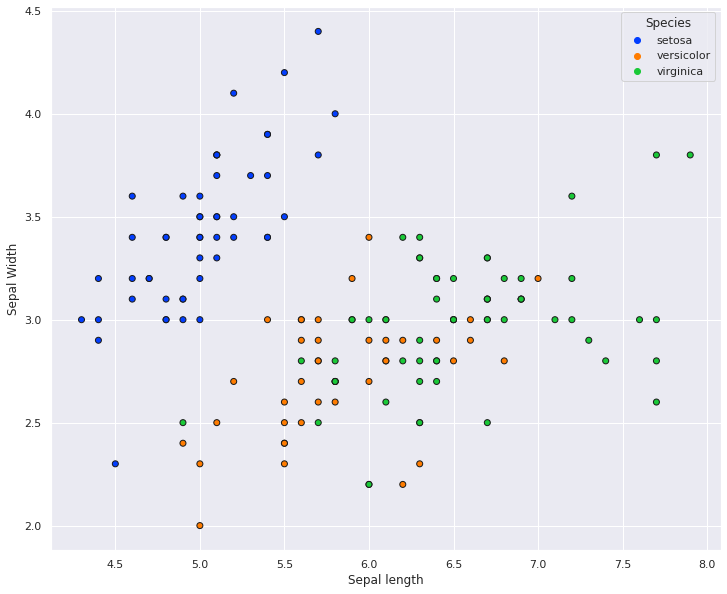

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
sns.set(style = "darkgrid")

#Visualise data with 2 features
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k', linewidth=1, palette="bright")
ax.legend(ax.legend_.legendHandles, iris.target_names, title='Species')

ax.set(xlabel='Sepal length', ylabel='Sepal Width')

In [8]:
cls_tree = ClassificationTree()
cls_tree.fit(X, y)

(3.8, 8.399999999999903, 1.5, 4.900000000000003)

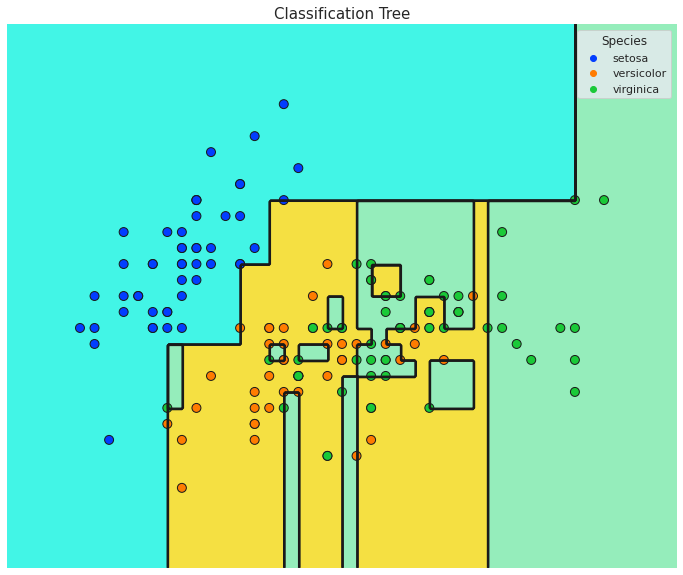

In [9]:
from matplotlib.colors import ListedColormap

# Step size in the mesh
h = .01

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = cls_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z)
# Create color map
cmap_light = ListedColormap(['#42f5e6', '#f5e042', '#95edbb'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(12, 10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.contour(xx, yy, Z, colors='k')

# Plot training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor='k',
                s=80, linewidth=1, palette="bright")
ax.legend(ax.legend_.legendHandles, iris.target_names, title='Species')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Classification Tree", fontsize=15)
ax.set(xlabel='Sepal length', ylabel='Sepal Width')
ax.axis('off')

### Regression Tree

In [10]:
class RegressionTree(DecisionTree):
    def _calculate_mse_reduction(self, y, y1, y2):
        loss_tot = squared_loss(y)
        loss_1 = squared_loss(y1)
        loss_2 = squared_loss(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # Calculate the squared loss reduction
        squared_loss_reduction = loss_tot - (frac_1 * loss_1 + frac_2 * loss_2)
        return squared_loss_reduction

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_mse_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

In [11]:
df = pd.read_csv('https://datahub.io/core/sea-level-rise/r/0.csv')

In [12]:
# Get elapsed time in days from time stamp
df['Time'] = pd.to_datetime(df['Time'])
df['Elapsed_Time'] = (df['Time'] - df['Time'].iloc[0]).astype("timedelta64[D]")
df.head()

,Time,GMSL,Elapsed_Time
0,1993-01-15,-1.6,0.0
1,1993-02-15,-3.4,31.0
2,1993-03-15,5.5,59.0
3,1993-04-15,0.1,90.0
4,1993-05-15,5.3,120.0


In [13]:
X = df['Elapsed_Time'].values
y = df['GMSL'].values

In [14]:
X = np.expand_dims(X, axis=1)
X.shape

(266, 1)

Text(0.5, 1.0, 'Global Mean Sea Level change (1993 - 2015)')

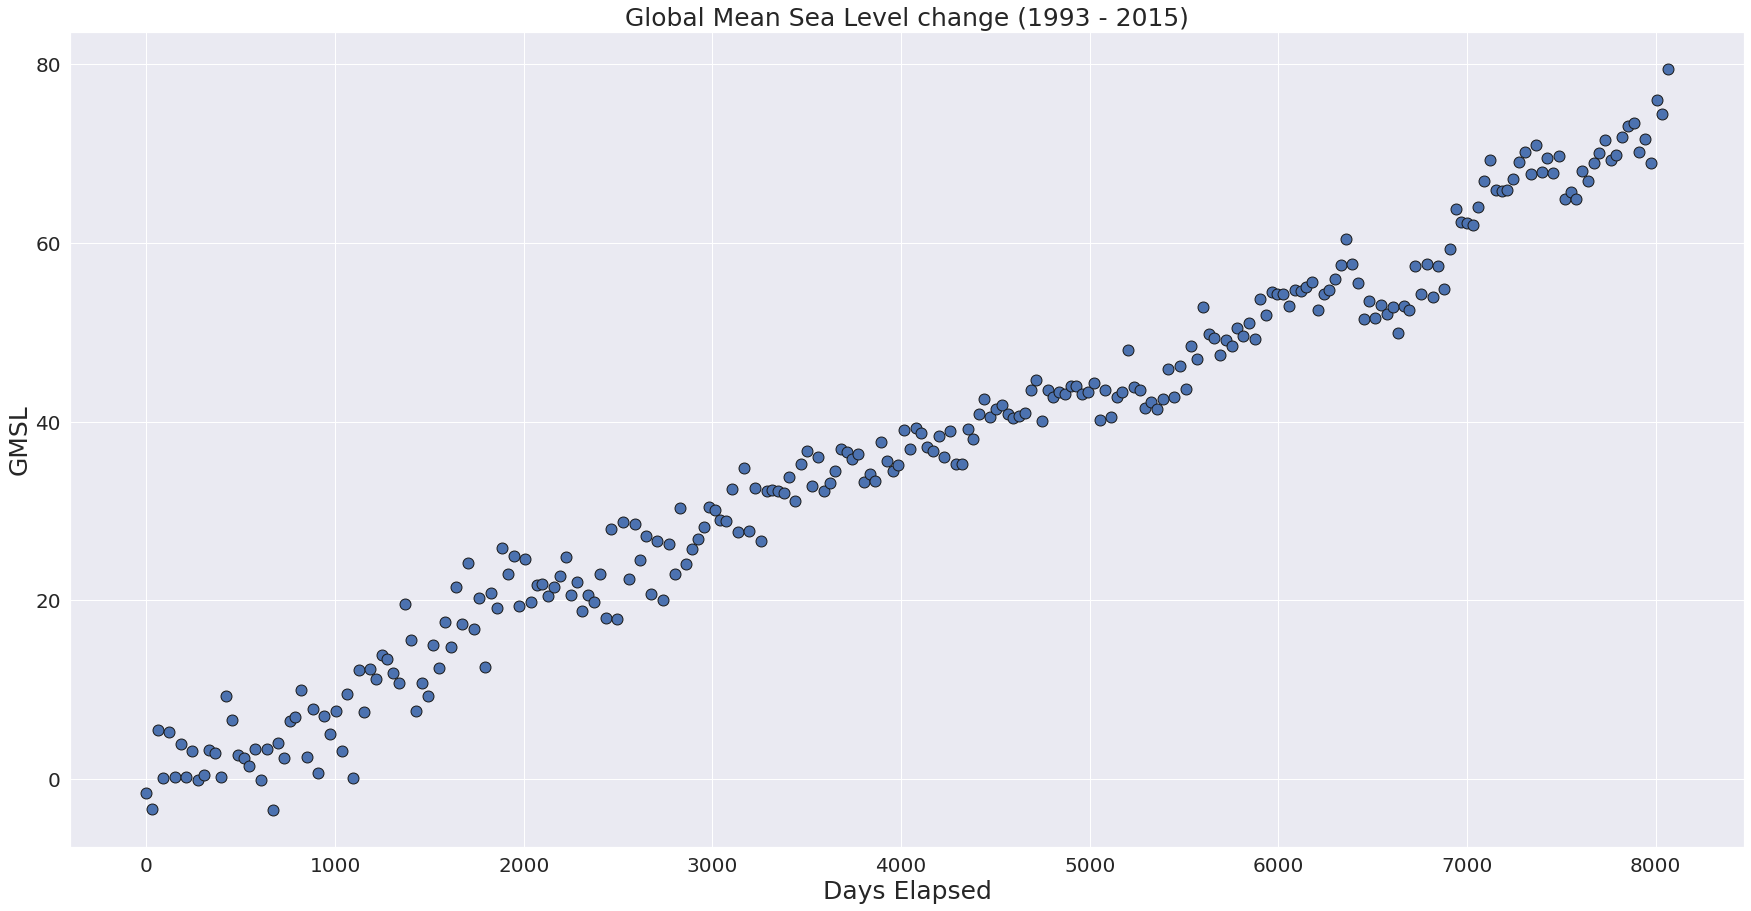

In [15]:
plt.figure(figsize=(30,15))
plt.scatter(X, y, s=120, edgecolor='k')
plt.yticks(fontsize=20)
plt.ylabel('GMSL', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Days Elapsed', fontsize=25)
plt.title('Global Mean Sea Level change (1993 - 2015)', fontsize=25)

In [16]:
max_depth = 5
reg_tree = RegressionTree(max_depth=max_depth) # Limit the depth of the tree
reg_tree.fit(X, y)

In [17]:
best_fit = reg_tree.predict(X)

Text(0.5, 1.0, 'Global Mean Sea Level change (1993 - 2015)\nTree Depth: 5')

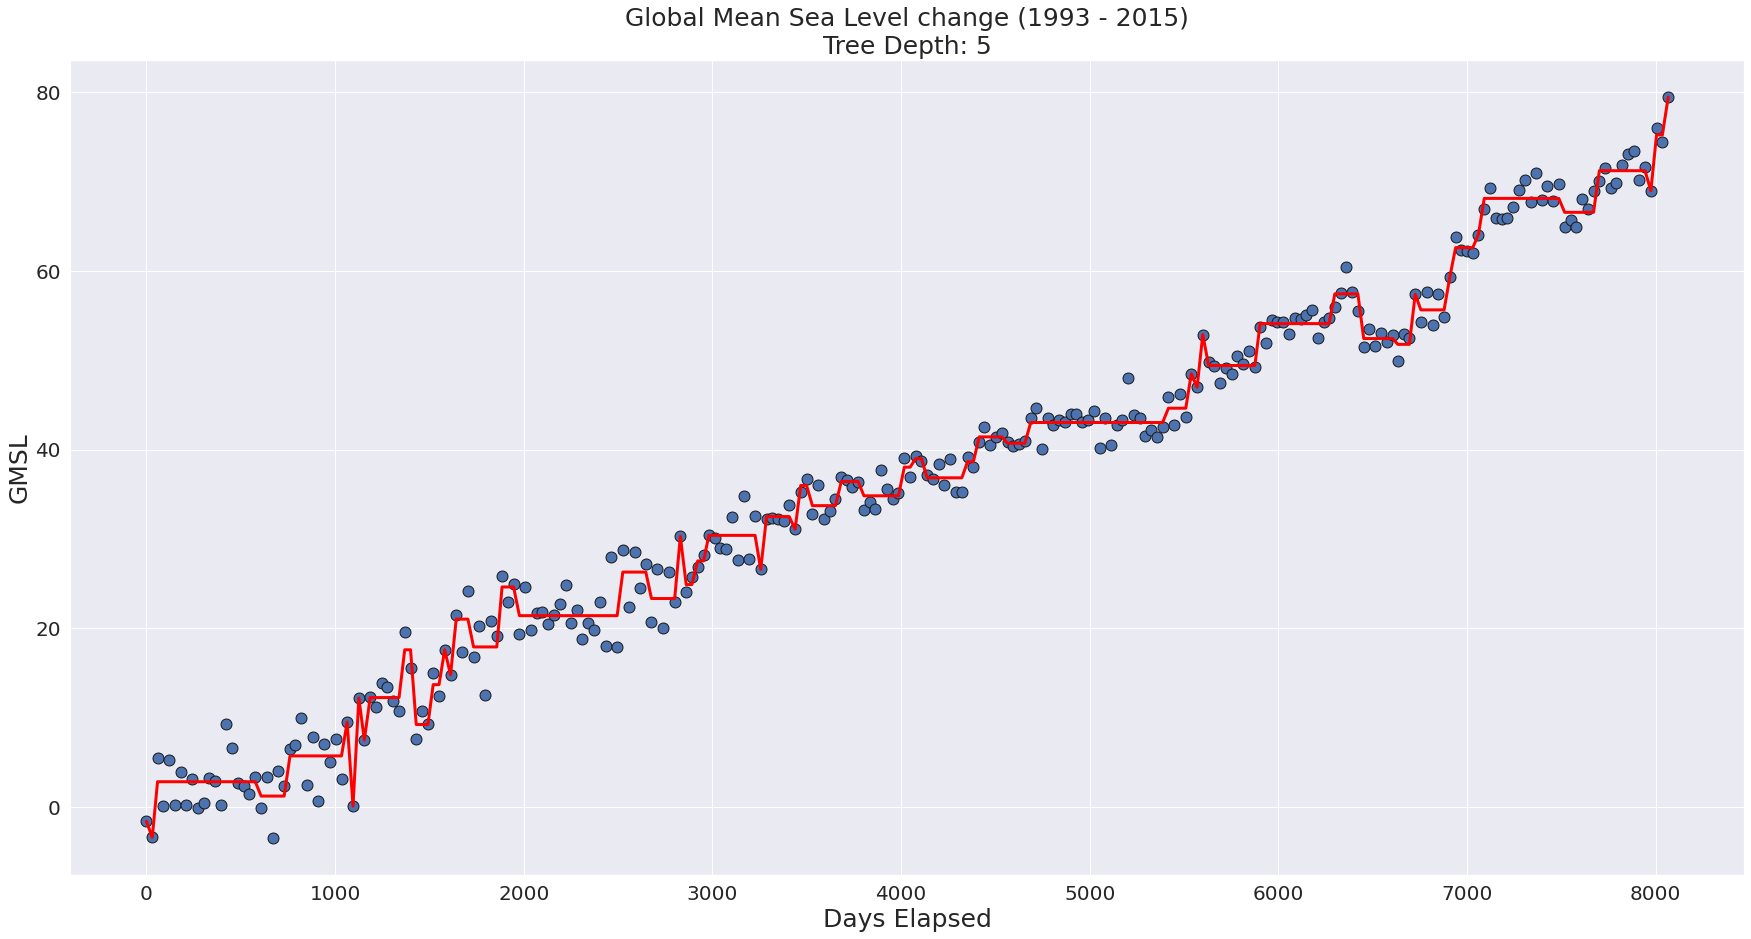

In [18]:
plt.figure(figsize=(30,15))
plt.scatter(X, y, s=120, edgecolor='k')
plt.plot(X, best_fit, lw=3, color='red')
plt.yticks(fontsize=20)
plt.ylabel('GMSL', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Days Elapsed', fontsize=25)
plt.title(f'Global Mean Sea Level change (1993 - 2015)\nTree Depth: {max_depth}', fontsize=25)

### References
[1] CS4780/CS5780: Machine Learning for Intelligent Systems. Kilian Weinberger, 2017.  https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html

[2] ML-From-Scratch. Erik Linder-Norén. https://github.com/eriklindernoren/ML-From-Scratch